In [148]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display

## Audio 1

In [149]:
ipd.Audio('Audio/hiphop_jblanked_4bts.wav')

In [150]:
# x = array of audio samples, by setting sr=None, librosa will import the file at its native sampling rate. Otherwise it will default to 22050.
hhop, sh = librosa.load('Audio/DrumBeat.wav', sr=None)
print(hhop.shape)
print(sh)

(124103,)
44100


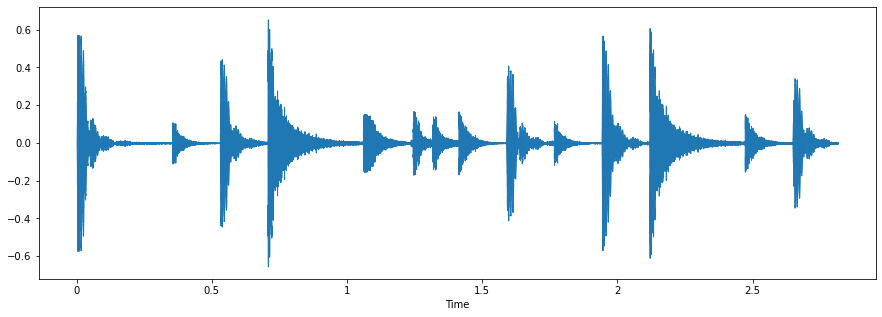

In [151]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(hhop, sr=sh)

## Audio 2

In [152]:
ipd.Audio('Audio/gurgle1.wav')

In [153]:
# x = array of audio samples, by setting sr=None, librosa will import the file at its native sampling rate. Otherwise it will default to 22050.
old, so = librosa.load('Audio/gurgle1.wav', sr=None)
print(old.shape)
print(so)

(213120,)
44100


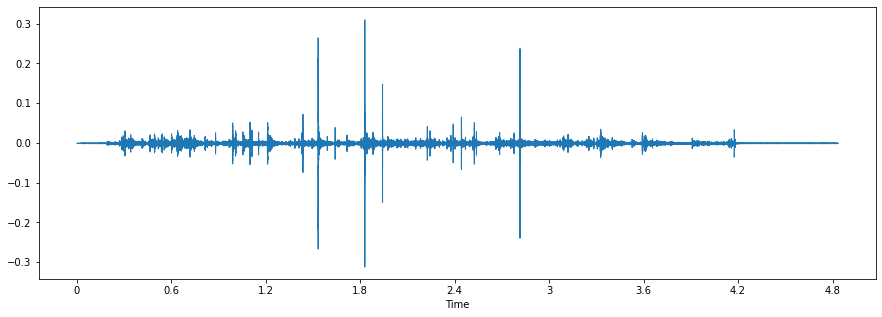

In [154]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(old, sr=so)

### 4 Unique Features

In [155]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(y=signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
        librosa.feature.spectral_flatness(y=signal)[0, 0],
        librosa.feature.spectral_contrast(y=signal)[0, 0],
    ]

In [156]:
hhop_features = numpy.array([extract_features(hhop[i: i + 2048]) for i in range(0, len(hhop), 2048)])
old_features  = numpy.array([extract_features(old[i: i + 2048]) for i in range(0, len(old), 2048)])

C:\Users\XBox9\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1223
  return f(*args, **kwargs)
C:\Users\XBox9\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=128
  return f(*args, **kwargs)


### Feature Graphs

Text(0, 0.5, 'Count')

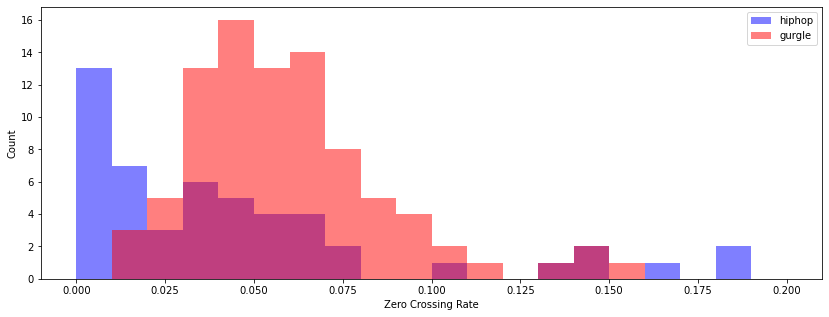

In [157]:
plt.figure(figsize=(14, 5))
plt.hist(hhop_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(old_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('hiphop', 'gurgle'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

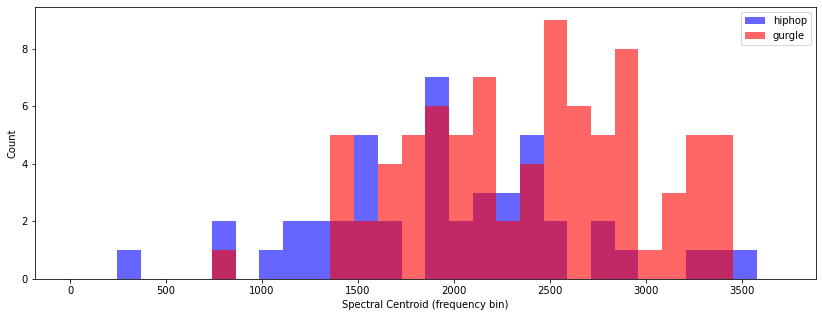

In [158]:
plt.figure(figsize=(14, 5))
plt.hist(hhop_features[:,1], color='b', range=(0, 3700), bins=30, alpha=0.6)
plt.hist(old_features[:,1], color='r', range=(0, 3700), bins=30, alpha=0.6)
plt.legend(('hiphop', 'gurgle'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

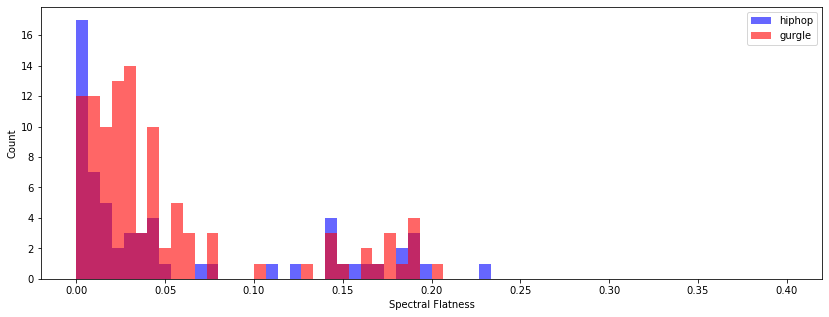

In [159]:
plt.figure(figsize=(14, 5))
plt.hist(hhop_features[:,2], color='b', range=(0, 0.4), bins=60, alpha=0.6)
plt.hist(old_features[:,2], color='r', range=(0, 0.4), bins=60, alpha=0.6)
plt.legend(('hiphop', 'gurgle'))
plt.xlabel('Spectral Flatness')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

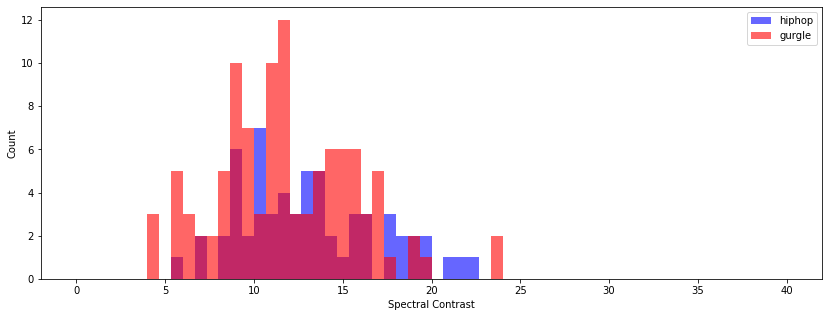

In [160]:
plt.figure(figsize=(14, 5))
plt.hist(hhop_features[:,3], color='b', range=(0, 40), bins=60, alpha=0.6)
plt.hist(old_features[:,3], color='r', range=(0, 40), bins=60, alpha=0.6)
plt.legend(('hiphop', 'gurgle'))
plt.xlabel('Spectral Contrast')
plt.ylabel('Count')

## Scatter Plots
Setup Feature Scatter Plots

In [161]:
feature_table = numpy.vstack((hhop_features, old_features))
print(hhop_features.shape)
print(old_features.shape)
print(feature_table.shape)

(61, 4)
(105, 4)
(166, 4)


In [162]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1. -1. -1.]
[1. 1. 1. 1.]


#### Most Contrast
  Zero Crossing Rate vs Spectral Centroid

61
(166, 4)


Text(0, 0.5, 'Spectral Centroid')

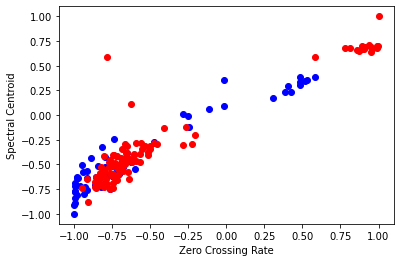

In [163]:
split = hhop_features.shape[0]
print(split)
print(training_features.shape)

plt.scatter(training_features[:split,0], training_features[:split,1], c='b')
plt.scatter(training_features[split:,0], training_features[split:,1], c='r')

plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

#### Least Contrast 
Flatness vs. Specral Contrast

61
(166, 4)


Text(0, 0.5, 'Spectral Contrast')

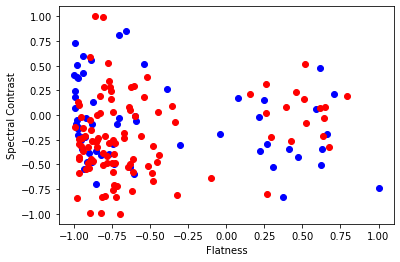

In [164]:
split = hhop_features.shape[0]
print(split)
print(training_features.shape)

plt.scatter(training_features[:split,2], training_features[:split,3], c='b')
plt.scatter(training_features[split:,2], training_features[split:,3], c='r')

plt.xlabel('Flatness')
plt.ylabel('Spectral Contrast')